Work on the Brooklyn Pedestrian Dataset: https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD

1) Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

2) Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

3) Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

HW1_NYU Spring 2024 Data Science Bootcamp.ipynb

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project.csv')

In [7]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

df['weekday'] = df['hour_beginning'].dt.weekday
df.head(10)

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,weekday
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0
5,2019-12-25 14:00:00,Brooklyn Bridge,3171,1685,1486,clear-day,44.0,0.0000,40.708164,-73.999509,Christmas Day,"(40.7081639691088, -73.9995087014816)",2
6,2019-01-27 21:00:00,Brooklyn Bridge,13,5,8,partly-cloudy-night,41.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",6
7,2019-02-07 04:00:00,Brooklyn Bridge,0,0,0,cloudy,39.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3
8,2019-01-03 21:00:00,Brooklyn Bridge,9,7,2,partly-cloudy-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3
9,2019-08-13 09:00:00,Brooklyn Bridge,520,281,239,partly-cloudy-day,76.0,0.0087,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1


In [21]:
# Filter the dataset to include only the rows corresponding to weekdays (Monday to Friday)
weekday_data = df[df['weekday'].isin([0, 1, 2, 3, 4])]

# Display the filtered dataset
#print(weekday_data.head(10))

week_ped_data = weekday_data.groupby('weekday')['Pedestrians'].sum()
#Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.
week_ped_data = pd.DataFrame(week_ped_data)
week_ped_data

,Pedestrians
weekday,
0,1481435
1,1394963
2,1310900
3,1370880
4,1588068


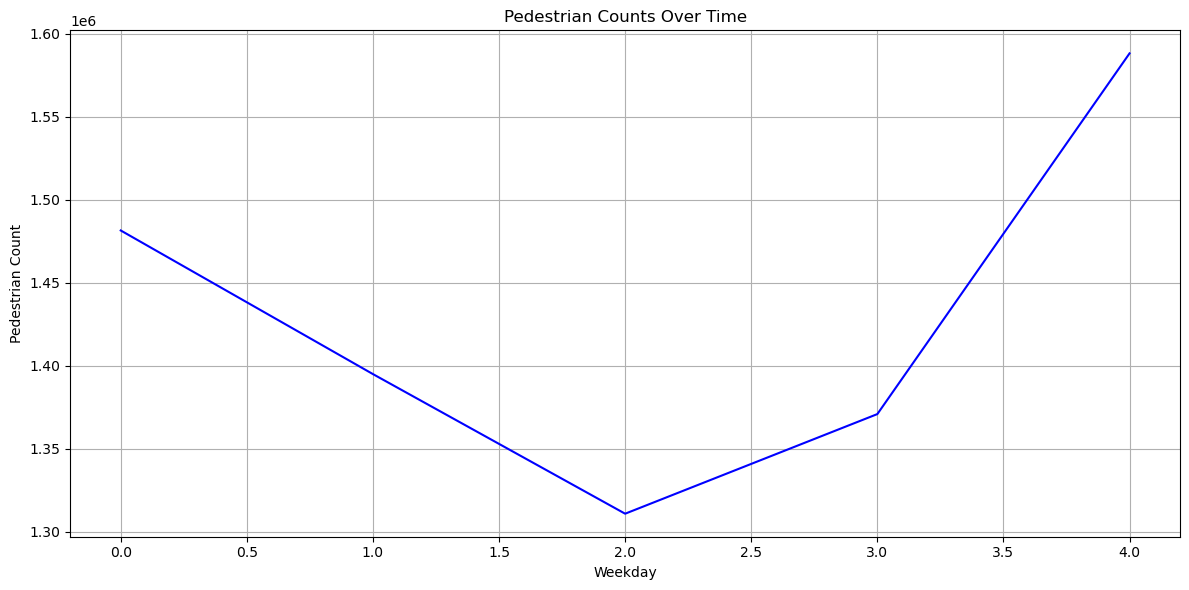

In [22]:
# Plotting a line plot of pedestrian counts over time
plt.figure(figsize=(12, 6))
plt.plot(week_ped_data.index, week_ped_data['Pedestrians'], color='blue')
plt.title('Pedestrian Counts Over Time')
plt.xlabel('Weekday')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.tight_layout()
plt.show()

Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

In [31]:
df_2019 = df[df['hour_beginning'].dt.year == 2019]
df_2019

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,weekday
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,2019-02-10 12:00:00,Brooklyn Bridge,1388,623,765,clear-day,31.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",6
8757,2019-11-10 08:00:00,Brooklyn Bridge,305,168,137,partly-cloudy-day,39.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",6
8758,2019-11-07 01:00:00,Brooklyn Bridge,0,0,0,clear-night,43.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3
8759,2019-04-26 11:00:00,Brooklyn Bridge,1437,613,824,cloudy,55.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4


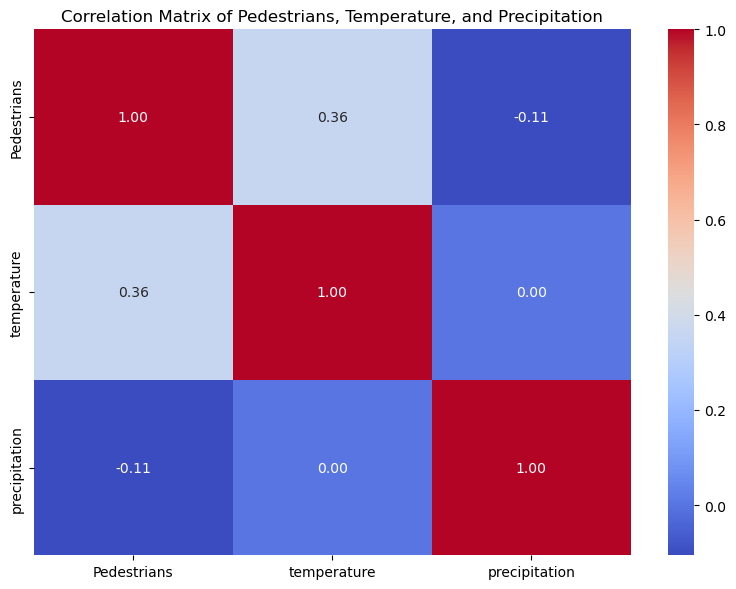

In [32]:

# Creating a correlation matrix
correlation_matrix = df_2019[['Pedestrians', 'temperature', 'precipitation']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pedestrians, Temperature, and Precipitation')
plt.tight_layout()
plt.show()

Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

In [42]:
def cate(x):
    t = 'night'
    if x.hour>=6 and x.hour<=12:
        t = 'morning'
    elif x.hour>=12 and x.hour<=18:
        t = 'afternoon'
    elif x.hour>=18 and x.hour<=24:
        t = 'evening'
    return t
        
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['time_perid'] = df['hour_beginning'].map(cate)
df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,weekday,time_peird,time_perid
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,night,night
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,evening,evening
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,evening,evening
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,evening,evening
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,night,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16052,2018-06-22 04:00:00,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,night,night
16053,2018-07-19 06:00:00,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,morning,morning
16054,2018-06-16 16:00:00,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",5,afternoon,afternoon
16055,2018-07-24 18:00:00,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,afternoon,afternoon


In [47]:
time_of_day = df.groupby('time_period')['Pedestrians'].sum()
time_of_day = pd.DataFrame(time_of_day)
time_of_day

,Pedestrians
time_perid,
afternoon,6413717
evening,997621
morning,3569325
night,52203


In [ ]:
# Plotting a line plot of pedestrian counts over time
plt.figure(figsize=(12, 6))
plt.plot(time_of_day.index, time_of_day['Pedestrians'], color='blue')
plt.title('Pedestrian Counts Over Time')
plt.xlabel('Time period')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.tight_layout()
plt.show()